# The Building Blocks of Bayesian Inference

## From Bayes Theorem to Bayesian Inference

Now that we have Bayes Theorem and have seen how it can be useful to move from the measurable $P(+, disease)$ to the desired $P(disease, +)$, let's see how it can help us move from $P(D|M)$ to $P(M|D),$ for data $D$ and a model $M.$ 

To do so, let's return to our example of a biased coin: let's say that we flip a biased coin several times and we want to estimate the probability of heads from the number of heads we saw. First, let's recall Bayes Theorem:

$$P(B|A) = \frac{P(A|B)P(B)}{P(A)}.$$








We can then calculate the probability of a particular $p=p(H)$ given data $D$ by setting $A$ in Bayes Theorem equal to $p$ and $B$ equal to $D$:

$$P(p|D) = \frac{P(D|p)P(p)}{P(D)} $$



In this equation, we call $P(p)$ the prior (distribution), $P(D|p)$ the likelihood and $P(p|D)$ the posterior (distribution). The intuition behind the nomenclature is as follows: the prior is the distribution containing our knowledge about $p$ prior to the introduction of the data $D$ & the posterior is the distribution containing our knowledge about $p$ after considering the data $D$.


**Essential remark:** we get the whole distribution of $P(p|D)$, not merely a point estimate plus errors bars, such as [95% confidence intervals](http://andrewgelman.com/2018/07/04/4th-july-lets-declare-independence-95/).


### Note on the term probability:

Note that we're _overloading_ the term _probability_ here. In fact, we have 3 distinct usages of the word:


- The probability $p$ of seeing a head when flipping a coin;
- The resulting binomial probability distribution $P(D|p)$ of seeing the data $D$, given $p$, also called the likelihood;
- The prior & posterior probability distributions of $p$, encoding our _uncertainty_ about the value of $p$.

### Key concept: the prior

We only need to know the posterior distribution $P(p|D)$ up to multiplication by a constant at the moment: this is because we really only care about the values of $P(p|D)$ relative to each other – for example, what is the most likely value of $p$? To answer such questions, we only need to know what $P(p|D)$ is proportional to, as a function of $p$. Thus we don’t currently need to worry about the term $P(D)$. In fact,

$$P(p|D) \propto P(D|p)P(p) $$

**Note:** What is the prior? Really, what do we know about $p$ before we see any data? Well, as it is a probability, we know that $0\leq p \leq1$. If we haven’t flipped any coins yet, we don’t know much else: so it seems logical that all values of $p$ within this interval are equally likely, i.e., $P(p)=1$, for $0\leq p \leq1$. This is known as an uninformative prior because it contains little information (there are other uninformative priors we may use in this situation, such as the Jeffreys prior, to be discussed later). People who like to hate on Bayesian inference tend to claim that the need to choose a prior makes Bayesian methods somewhat arbitrary, but as we’ll now see, if you have enough data, the likelihood dominates over the prior and the latter doesn’t matter so much.

## This is inference!

We are now beginning to see how to perform _inference_, that is, infering our degree-of-belief around unobservable quantities from observable data. Let's make this concrete with an example we're familiar with:

### Example: Bayesian parameter estimation

In order to estimate $p(H),$ let's now generate some coin flips as our data.
We'll write a function that takes two arguments, one the probability $p$, the other the number of flips $N.$

Before doing so, let's make two notes:

- given data $D$ consisting of $n$ coin tosses & $k$ heads, the likelihood function is given by $L:=P(D|p) \propto p^k(1-p)^{n-k}$ so we have included this in the computation. You don't necessarily need to know this and when using probabilistic programming, you will not need to hard code such likelihoods;
- given a uniform prior, which we use in this case, the posterior is proportional to the likelihood.

In [1]:
#| output: false
#Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact
from generative_thinking.utils import ecdf
#import arviz as az
%matplotlib inline
sns.set()

/Users/hba/opt/anaconda3/envs/generative-thinking/lib/python3.9/site-packages/aesara/link/jax/dispatch.py:87: UserWarning: JAX omnistaging couldn't be disabled: Disabling of omnistaging is no longer supported in JAX version 0.2.12 and higher: see https://github.com/google/jax/blob/main/design_notes/omnistaging.md.
  warnings.warn(f"JAX omnistaging couldn't be disabled: {e}")
/Users/hba/opt/anaconda3/envs/generative-thinking/lib/python3.9/site-packages/pymc/sampling_jax.py:36: UserWarning: This module is experimental.
  warnings.warn("This module is experimental.")


In [2]:
def plot_posterior_flip(p=0.6, N=0):
    """Plot the posterior given a uniform prior; Bernoulli trials
    with probability p; sample size N"""
    np.random.seed(42)
    # Flip coins 
    n_successes = np.random.binomial(N, p)
    # X-axis for PDF
    x = np.linspace(0, 1, 100)
    # Prior
    prior = 1
    # Compute posterior, given the likelihood (analytic form)
    posterior = x**n_successes*(1-x)**(N-n_successes)*prior
    posterior /= np.max(posterior)  # so that peak always at 1
    plt.plot(x, posterior)
    plt.xlabel('p')
    plt.ylabel('L')



Lets now use this function to generate data and a posterior for $N=10$ and $p=0.6.$

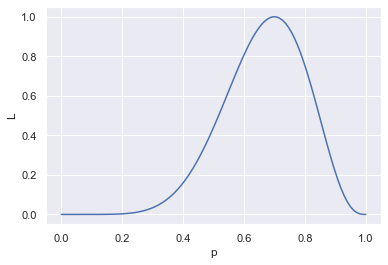

In [3]:
plot_posterior_flip(N=10)

We'll now generate data and their respective posteriors for combinations of $p=0.5$ and $n\in\{5,10,50,100\}.$ The intention here is to show how the posterior narrows as we collect more and more data, thus providing more certainty around our estimate of $p.$

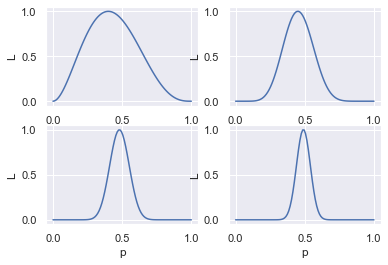

In [4]:
plt.subplot(2, 2, 1)
plot_posterior_flip(p=0.5, N=5);
plt.subplot(2, 2, 2)
plot_posterior_flip(p=0.5, N=20);
plt.subplot(2, 2, 3)
plot_posterior_flip(p=0.5, N=50);
plt.subplot(2, 2, 4)
plot_posterior_flip(p=0.5, N=100);


We encourage the reader to check out the github repository and use this code to play around with different values of $p$ and $N.$ Think about what you discover! For example, can you see that the closer $p$ is to $0.5$, the more data you need in order to be certain of your estimate. Why would this be the case?

If you're doing this in a Jupyter notebook, you can use the great ipywidget interact to check out the posterior as you generate more and more data (you can also vary $p$):

In [5]:
#| output: false
interact(plot_posterior_flip, p=(0, 1, 0.01), N=(0, 1500));

interactive(children=(FloatSlider(value=0.6, description='p', max=1.0, step=0.01), IntSlider(value=0, descript…

Let's now move onto the real-world example we encountered in Chapter 5, that of estimating batting averages for baseball players.

## Example: batting averages

In Chapter 5, we saw that we could use the beta distribution to model what we know about the probability of batting averages in baseball. In particular, given data on many players, we began with the question:

> Who is the better batter out of the following? Batter $A$ with 3 out of 10 hits or batter $B$ with 250 out of $1000$ hits. 


The challenge is that $A$'s batting average is 0.3 and $B$'s is 0.25, but we have much less data to go on with $A$! So we use the Empirical Bayes method, in the following 2 steps:

1. Estimate a prior from all of our data;
2. Use that distribution as a prior for each individual estimate.

Note that the use of data to estimate our prior is not standard in Bayesian inference and we'll get to other methods soon, but it is a useful way to illustrate the important concepts here.

Recall that fitting a beta distribution to data involves estimating two shape parameters, $\alpha$ and $\beta$, and that we did Step 1 in Chapter 5, as follows:

0.25858687458828294 0.0006178976021790106
79.97509357607375 229.3023734392516


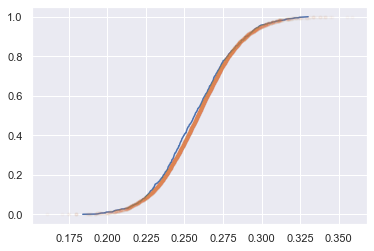

In [6]:
df_batting = pd.read_csv('../../datasets/Batting.csv')
df_p = pd.read_csv('../../datasets/Pitching.csv')
df_batting.head()

dfg = df_batting[['playerID','AB','H']].groupby(['playerID']).sum()
dfg['Av'] = dfg['H']/dfg['AB']
dfg.reset_index(inplace=True)

dfg = dfg[~dfg.playerID.isin(df_p.playerID.unique())]

#df = dfg[dfg['Av'] > 0.18]
dfg = dfg[dfg['AB'] > 500]
dfg.dropna(inplace=True)
#plt.hist(dfg['Av'],bins=50);

data = dfg['Av']
m = np.mean(data)
v = np.var(data)
print(m, v)

a = m**2*((1-m)/v - 1/m)
b = a*(1/m - 1)
print(a, b)
samples = np.random.beta(a, b, 10**3)
#plt.hist(samples, bins=50);

# Compute ECDFs for sample & model
x, y = ecdf(np.array(data))
x_theor, y_theor = ecdf(samples)
# Plot sample & model ECDFs
plt.plot(x_theor, y_theor);
plt.plot(x, y, marker='.', linestyle='none', alpha=0.03);

So $\alpha \approx 80$ and $\beta \approx 229.$

This was Step 1, estimating a prior from all your data. Then Step 2 is to use that distribution as a prior for each individual estimate:

- for any batter with $\alpha_0$ hits from $\beta_0$ at bats, we add $\alpha_0$ to $\alpha$ and $\alpha_0 + \beta_0$ to $\beta$ (this is a particular and super handy characteristic of the beta distribution).

So the posterior for a batter with 3 out of 10 hits is $\beta(83, 239),$ which has a mode of $82/319 \simeq 0.26,$ and the posterior for a batter with 250 out of 1000 hits is $\beta(330, 489),$ which has a mode of $329/817 \simeq 0.40.$

So we see that, using our Empirical Bayes prior, our batting average estimate for batter $B$ with 250 out of $1000$ hits is higher than that for Batter $A$ with 3 out of 10 hits!

Let's now do this computation for all our players in the dataset:

In [7]:
dfg['eb_est'] = (dfg['H'] + a)/(dfg['AB'] + a + b)
dfg.head()

,playerID,AB,H,Av,eb_est
1,aaronha01,12364,3771,0.304998,0.303866
2,aaronto01,944,216,0.228814,0.236161
7,abbated01,3044,772,0.253614,0.254072
11,abbotfr01,513,107,0.208577,0.227387
13,abbotje01,596,157,0.263423,0.261771


## Wrapping up

In this chapter, we have built from Bayes Theorem to introduce the basic building blocks of Bayesian inference:

* the prior distribution
* the likelihood function, and
* the posterior distribution.

We have demonstrated how they allow us to move from $P(D|M)$ to $P(M|D),$ for data $D$ and a model $M$, and we have provided two examples:

* estimating the probability of heads in biased coin flip,
* estimating the batting average of baseball players.

In the process, we saw how generating more data can impact the posterior. We also disambiguated the overloaded term _probability_ and discussed certain nuances, such as the choice of the prior. At this point, it is worth saying more about the prior distribution and we will do so in the next chapter. Then we will be ready to use probabilistic programming to build our Bayesian inference machines.